In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración del generador de imágenes para el entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)  # Usamos un 20% de las imágenes para la validación

train_generator = train_datagen.flow_from_directory(
    'datasets/ASL_Alphabet_Dataset/asl_alphabet_train',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Conjunto de datos de entrenamiento

validation_generator = train_datagen.flow_from_directory(
    'datasets/ASL_Alphabet_Dataset/asl_alphabet_train',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Conjunto de datos de validación

# Configuración del generador de imágenes para el conjunto de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'datasets/test',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical')  # Conjunto de datos de prueba

# Definición del modelo
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                 strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                 strides=1, activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=29, activation='softmax'))  # Cambié a 29 unidades para incluir las letras adicionales

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(train_generator,
          epochs=35,
          validation_data=validation_generator,
          shuffle=True)
# Guardar el modelo entrenado
model.save('ASL_language_model.h5')
# Evaluación del modelo en el conjunto de validación
(ls, acc) = model.evaluate(validation_generator)
print('VALIDATION ACCURACY = {}%'.format(acc * 100))

# Evaluación del modelo en el conjunto de prueba
(ls, acc) = model.evaluate(test_generator)
print('TEST ACCURACY = {}%'.format(acc * 100))



Found 178472 images belonging to 29 classes.
Found 44602 images belonging to 29 classes.
Found 63 images belonging to 21 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,917 (1.23 MB)

 Trainable params: 321,917 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 2281s 408ms/step - accuracy: 0.2572 - loss: 2.5129 - val_accuracy: 0.5278 - val_loss: 1.8829
Epoch 2/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 1740s 312ms/step - accuracy: 0.6227 - loss: 1.1804 - val_accuracy: 0.5999 - val_loss: 1.6703
Epoch 3/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 544s 97ms/step - accuracy: 0.6987 - loss: 0.9287 - val_accuracy: 0.6288 - val_loss: 1.6198
Epoch 4/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 528s 95ms/step - accuracy: 0.7376 - loss: 0.8063 - val_accuracy: 0.6327 - val_loss: 1.6612
Epoch 5/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 476s 85ms/step - accuracy: 0.7602 - loss: 0.7296 - val_accuracy: 0.6456 - val_loss: 1.5871
Epoch 6/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 504s 90ms/step - accuracy: 0.7783 - loss: 0.6829 - val_accuracy: 0.6563 - val_loss: 1.6553
Epoch 7/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 487s 87ms/step - accuracy: 0.7888 - loss: 0.6472 - val_accuracy: 0.6715 - val_loss: 1.5955
Epoch 8/35
5578/5578 ━━━━━━━━━━━━━━━━━━━━ 505s 90ms/step - accura

Evaluar el modelo creado antes

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - accuracy: 1.0000 - loss: 0.0053
TEST ACCURACY = 100.0%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


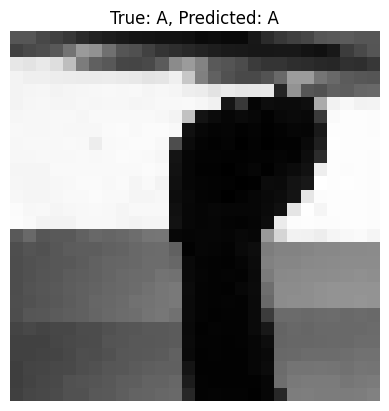

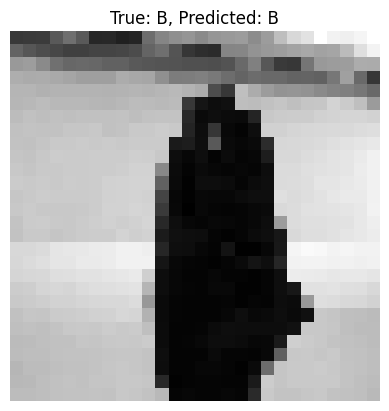

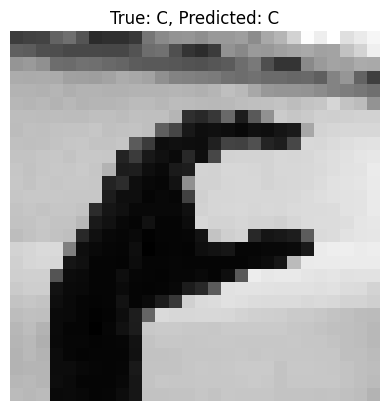

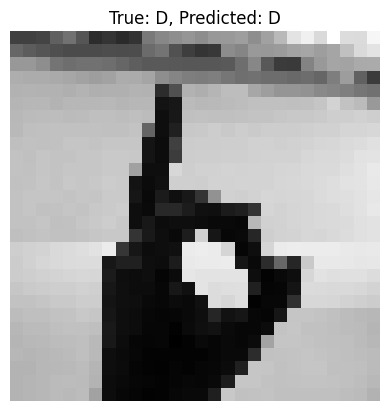

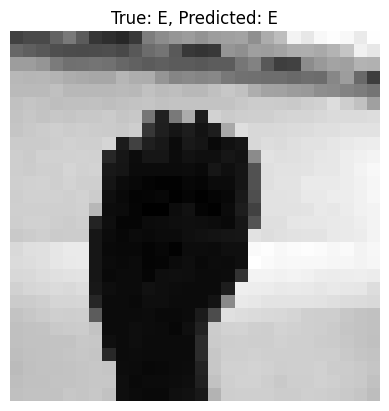

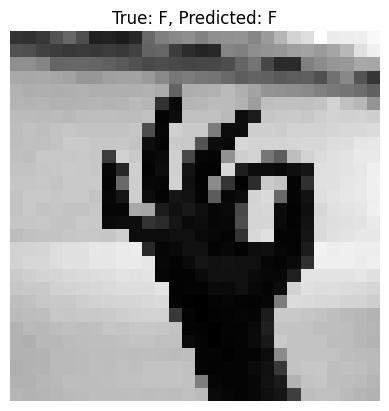

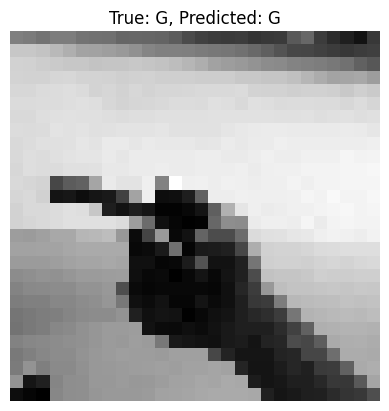

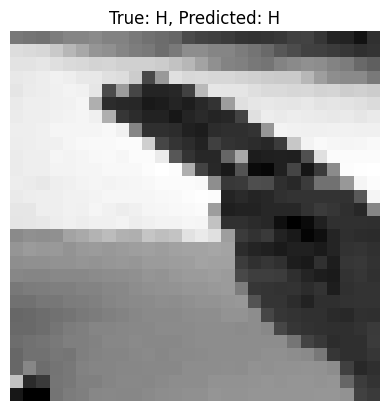

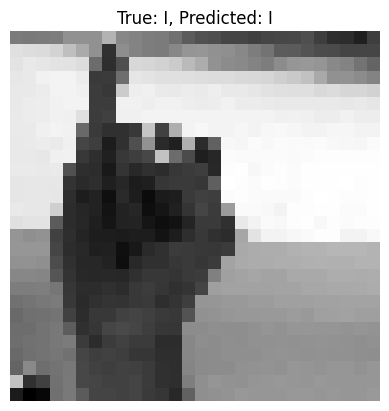

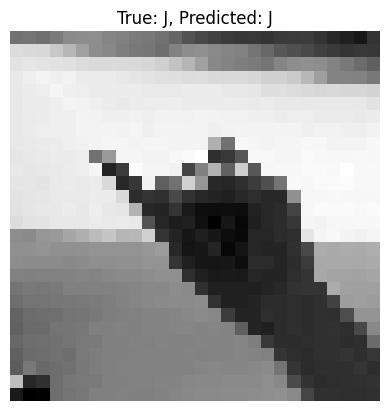

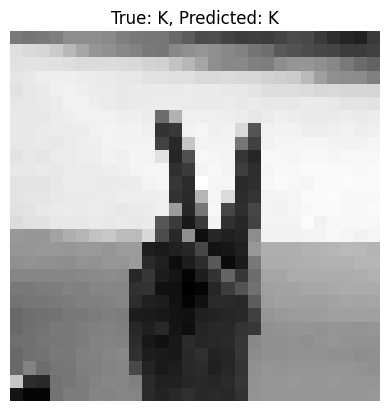

In [142]:
import os
import numpy as np
import pandas as pd
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Cargar el modelo guardado
model = load_model('ASL_language_model.h5')

# Configuración del generador de imágenes para la normalización
test_datagen = ImageDataGenerator(rescale=1./255)

# Directorio de imágenes de prueba
test_dir = 'datasets/ASL_Alphabet_Dataset/asl_alphabet_test'

# Mapeo de nombres de archivos a etiquetas
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# Cargar y procesar imágenes manualmente
test_images = []
test_labels = []

for class_name in class_names:
    image_path = os.path.join(test_dir, f"{class_name}_test.jpg")
    if os.path.exists(image_path):
        img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = test_datagen.standardize(img_array)
        test_images.append(img_array)
        test_labels.append(class_names.index(class_name))

# Convertir listas a matrices numpy
test_images = np.vstack(test_images)
test_labels = np.array(test_labels)

# Convertir etiquetas a one-hot encoding con 29 clases
test_labels = np.eye(29)[test_labels]

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print('TEST ACCURACY = {}%'.format(accuracy * 100))

# Realizar predicciones
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las imágenes con sus predicciones
for i in range(len(test_images)):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}, Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()
    if i == 10:  # Mostrar solo los primeros 10 resultados
        break



In [17]:
import os
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Cargar el modelo guardado
model = load_model('ASL_language_model.h5')

# Configuración del generador de imágenes para la normalización
test_datagen = ImageDataGenerator(rescale=1./255)

# Directorio de imágenes de prueba
test_dir = 'datasets/ASL_Alphabet_Dataset/asl_alphabet_test'

# Mapeo de nombres de archivos a etiquetas
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# Inicializar listas para almacenar imágenes y etiquetas de prueba
test_images = []
test_labels = []

# Cargar y procesar imágenes desde el directorio de pruebas
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, filename)
            if image_path.endswith('.jpg'):
                img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
                img_array = img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array = test_datagen.standardize(img_array)
                test_images.append(img_array)
                test_labels.append(class_names.index(class_name))

# Convertir listas a matrices numpy
test_images = np.vstack(test_images)
test_labels = np.array(test_labels)

# Convertir etiquetas a one-hot encoding con 29 clases
test_labels = np.eye(29)[test_labels]

# Verificar algunas imágenes y etiquetas antes de la evaluación
for i in range(5):  # Mostrar 5 imágenes para verificar
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
    plt.show()

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print('TEST ACCURACY = {}%'.format(accuracy * 100))

# Realizar predicciones
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las imágenes con sus predicciones
for i in range(len(test_images)):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[np.argmax(test_labels[i])]}, Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()
    if i == 10:  # Mostrar solo los primeros 10 resultados
        break


ValueError: need at least one array to concatenate

In [8]:

# Ejemplo de uso del modelo con una nueva imagen
img_path = 'datasets/test/A/20190428_235302.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Hacer predicción
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Mostrar la clase predicha
predicted_label = index_to_class[predicted_class[0]]
print(f"La clase predicha es: {predicted_label}")

# Evaluación del modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(validation_generator)
print(f'VALIDATION ACCURACY = {val_acc * 100:.2f}%')

# Evaluación del modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_generator)
print(f'TEST ACCURACY = {test_acc * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
La clase predicha es: Y
   2/1394 ━━━━━━━━━━━━━━━━━━━━ 2:02 88ms/step - accuracy: 0.6484 - loss: 2.5535  

c:\Users\207814636\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 699/1394 ━━━━━━━━━━━━━━━━━━━━ 4:14 366ms/step - accuracy: 0.7297 - loss: 1.8087

KeyboardInterrupt: 

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2468 - loss: 5.6737
TEST ACCURACY = 25.055772066116333%
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


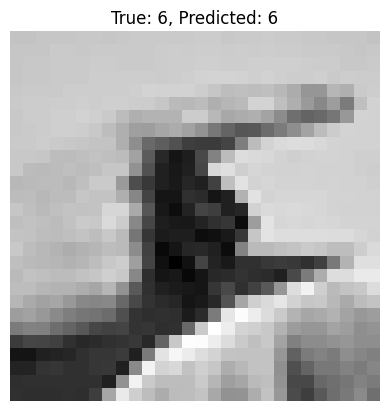

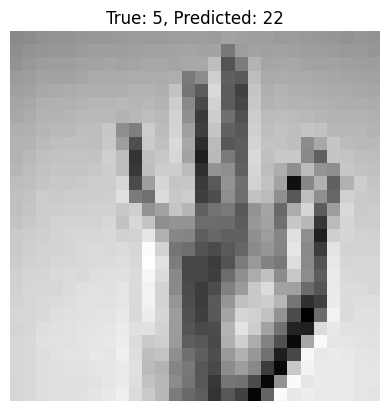

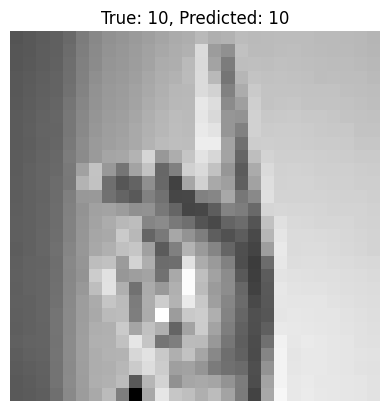

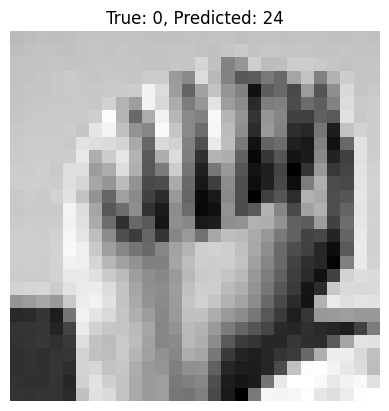

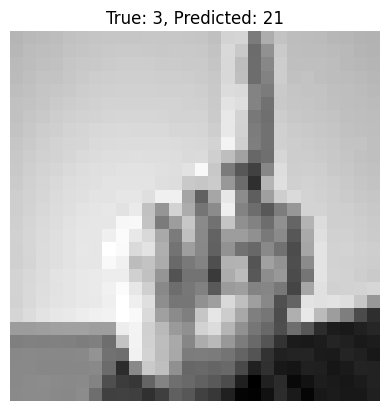

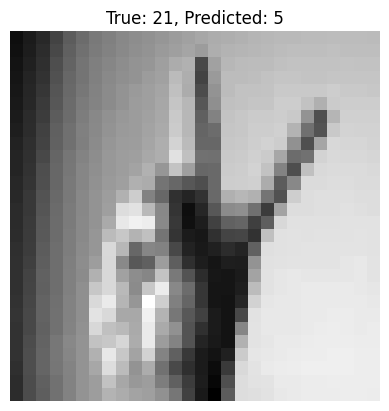

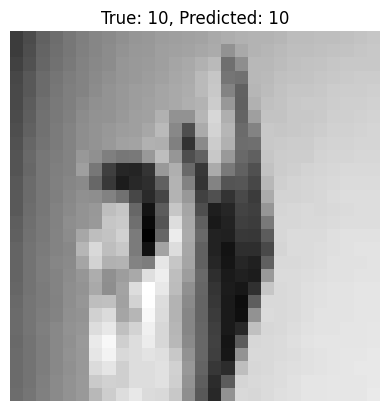

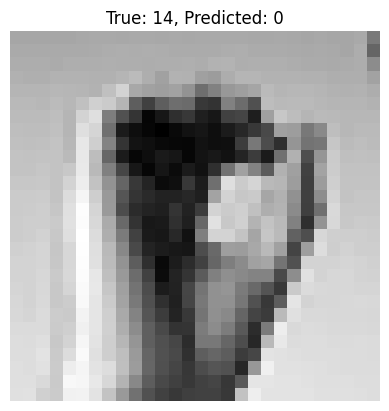

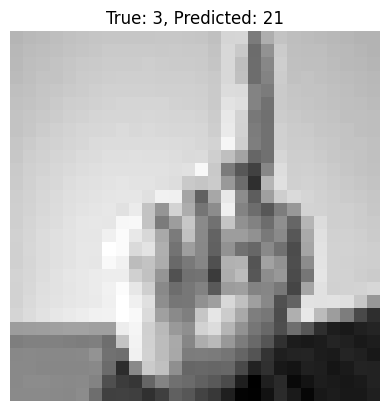

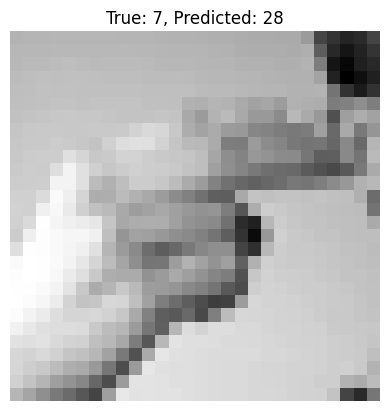

In [22]:
import numpy as np
import pandas as pd
from keras.models import load_model
import matplotlib.pyplot as plt

# Cargar el modelo guardado
model = load_model('ASL_language_model.h5')

# Cargar el archivo CSV
csv_file_path = 'datasets/sign_mnist_test.csv'
test_df = pd.read_csv(csv_file_path)

# Separar las etiquetas y las imágenes
test_labels = test_df['label'].values
test_images = test_df.drop(['label'], axis=1).values

# Normalizar las imágenes
test_images = test_images / 255.0

# Reformatear las imágenes para que sean compatibles con el modelo (28x28 píxeles y 1 canal)
test_images = test_images.reshape(-1, 28, 28, 1)

# Convertir las etiquetas a one-hot encoding
num_classes = 29  # Número total de clases, ajusta según sea necesario
test_labels_one_hot = np.eye(num_classes)[test_labels]

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)
print('TEST ACCURACY = {}%'.format(accuracy * 100))

# Realizar predicciones y mostrar los resultados
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar algunas imágenes con sus predicciones
for i in range(10):  # Mostrar solo las primeras 10 imágenes
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()



In [3]:
import cv2
import mediapipe as mp
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import time

# Cargar el modelo entrenado
model = load_model('ASL_language_model.h5')

# Obtener el diccionario de clases e índices del generador de entrenamiento
class_indices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
index_to_class = {v: k for k, v in class_indices.items()}

# Inicializar MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils

# Inicializar la captura de video
cap = cv2.VideoCapture(0)

# Configuración de cooldown
cooldown_time = 2  # Cooldown de 2 segundos
last_detection_time = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir la imagen a RGB
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Procesar la imagen para encontrar manos
    results = hands.process(image_rgb)

    # Obtener el tiempo actual
    current_time = time.time()

    if results.multi_hand_landmarks and (current_time - last_detection_time > cooldown_time):
        for hand_landmarks in results.multi_hand_landmarks:
            # Dibujar las anotaciones de la mano en la imagen
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Obtener los puntos de la mano y calcular el cuadro delimitador
            x_coords = [landmark.x for landmark in hand_landmarks.landmark]
            y_coords = [landmark.y for landmark in hand_landmarks.landmark]

            x_min = int(min(x_coords) * frame.shape[1])
            x_max = int(max(x_coords) * frame.shape[1])
            y_min = int(min(y_coords) * frame.shape[0])
            y_max = int(max(y_coords) * frame.shape[0])

            # Extraer la región de interés (ROI)
            roi = frame[y_min:y_max, x_min:x_max]

            # Preprocesar la ROI para que coincida con el formato de entrada del modelo
            if roi.size != 0:  # Asegurarse de que la ROI no esté vacía
                roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                roi_resized = cv2.resize(roi_gray, (28, 28))
                roi_array = img_to_array(roi_resized)
                roi_array = np.expand_dims(roi_array, axis=0)
                roi_array = roi_array / 255.0

                # Hacer predicción
                prediction = model.predict(roi_array)
                predicted_class = np.argmax(prediction, axis=1)
                predicted_label = index_to_class[predicted_class[0]]

                # Mostrar la clase predicha en la imagen
                cv2.putText(frame, f'Prediction: {predicted_label}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

                # Actualizar el tiempo de la última detección
                last_detection_time = current_time

    # Mostrar la imagen con las anotaciones
    cv2.imshow('Hand Detection with Prediction', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Liberar los recursos
cap.release()
cv2.destroyAllWindows()


c:\Users\207814636\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Definir el modelo
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 29)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Cargar el modelo guardado
model = CNN()
model.load_state_dict(torch.load('ASL_language_model.h5'))
model.eval()

# Definir transformaciones para las imágenes de prueba
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Mapeo de nombres de archivos a etiquetas
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

def capture_image():
    # Capturar imagen desde la cámara
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: No se puede abrir la cámara.")
        return None
    
    ret, frame = cap.read()
    if not ret:
        print("Error: No se puede leer la imagen de la cámara.")
        cap.release()
        return None

    # Guardar la imagen capturada temporalmente
    image_path = 'captured_image.png'
    cv2.imwrite(image_path, frame)

    # Liberar la cámara
    cap.release()
    cv2.destroyAllWindows()
    return image_path

def preprocess_image(image_path, target_size=(28, 28)):
    # Cargar y procesar la imagen
    img = Image.open(image_path).convert('grayscale')
    img = transform(img)
    img = img.unsqueeze(0)  # Añadir dimensión para el lote
    return img

def predict_image_from_camera():
    # Capturar la imagen
    image_path = capture_image()
    if image_path is None:
        return

    # Preprocesar la imagen capturada
    img_tensor = preprocess_image(image_path, target_size=(28, 28))
    
    # Realizar predicción
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted_class = torch.max(outputs, 1)
        predicted_label = class_names[predicted_class.item()]

    # Mostrar la imagen preprocesada con la predicción
    plt.imshow(img_tensor[0].permute(1, 2, 0).numpy() * 0.5 + 0.5)  # Des-normalizar la imagen
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Llamar a la función para predecir la imagen de la cámara
predict_image_from_camera()


UnpicklingError: invalid load key, 'H'.